You can use this to benchmark your deep learning models!

### Import dependencies

In [77]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

### Setting parameters

In [106]:
IMG_HEIGHT = 260
IMG_WIDTH = 260

os.chdir("../data/")
current_directory = os.getcwd()

### Loading the dataset

In [112]:
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
            image_path= os.path.join(img_folder, dir1,  file)
            # image_path = "D:\Year_3_Sem_1\FIT3161\Deep Learning\ebn-classification\EBN-Grade-Classification\data\\b\DALL·E 2023-05-11 14.05.41.png"
            image = cv2.imdecode(np.fromfile(image_path, dtype=np.uint8), cv2.IMREAD_UNCHANGED)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name

# extract the image array and class name
img_data, class_name = create_dataset(current_directory)

### Create unique value for classes

In [113]:
target_dict={k: v for v, k in enumerate(np.unique(class_name))}
target_dict

{'a': 0, 'b': 1, 'others': 2}

### Convert the class name to respective numeric value

In [114]:
target_val=  [target_dict[class_name[i]] for i in range(len(class_name))]

### Splitting the dataset

In [115]:
# flattening the images
images = np.array(img_data, np.float32) 
no_of_samples = images.shape[0]
flattened_images = images.reshape(no_of_samples, -1)

X_train, X_test, Y_train, Y_test = train_test_split(flattened_images, np.array(list(map(int,target_val)), np.float32), test_size=0.2, random_state=42)

### Visualize images

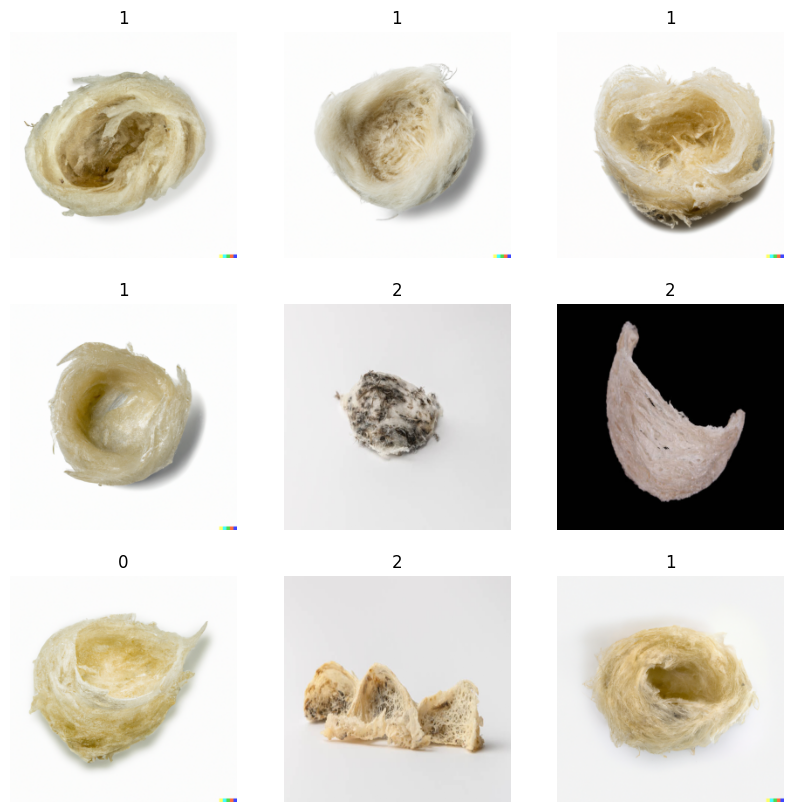

In [116]:
plt.figure(figsize=(10, 10))
number_of_images = 9
indices = np.random.choice(no_of_samples, number_of_images, replace=False)
for i, idx in enumerate(indices):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(images[idx])
  plt.title(target_val[idx])
  plt.axis("off")

### Using Logistic Regression

In [117]:
model = LogisticRegression(solver='lbfgs', max_iter=3000)

### Fitting the model

In [118]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=3000)

### Predicting the model

In [119]:
y_pred = model.predict(X_test)

### Comparing actual result vs prediction

In [120]:
print("Logistic Regression model accuracy(in %):",
      metrics.accuracy_score(Y_test, y_pred)*100)

Logistic Regression model accuracy(in %): 80.0
